* Lab1

** Partie 1

EX1: Calculer 𝑟 = 𝑢 + 𝑣  avec NumPy

u = (4, 1)
v = (-2, 3)
r = (2, 4)


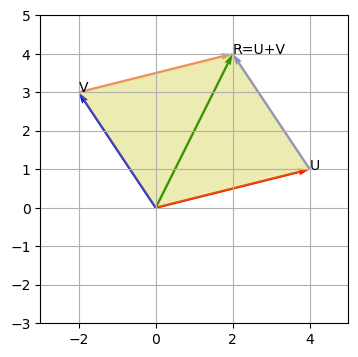

In [19]:
import numpy as np
import matplotlib.pyplot as plt

u = np.array([4,1])
v = np.array([-2,3])    
r = u + v

# affichage
print(f"u = ({u[0]}, {u[1]})")
print(f"v = ({v[0]}, {v[1]})")
print(f"r = ({r[0]}, {r[1]})")

o = np.array([0,0])  # origine

# visualize
plt.figure(figsize=(6,4))
plt.gca().set_aspect('equal', adjustable='box')
plt.quiver(*o, *u, color='r', angles='xy', scale_units='xy', scale=1, label='u')
plt.text(*u, "U")
plt.quiver(*o, *v, color="b", angles="xy", scale_units="xy", scale=1, label='v')
plt.text(*v, "V")
plt.quiver(*o, *r, color="g", angles="xy", scale_units="xy", scale=1, label='r')
plt.text(*r, "R=U+V")

# parallélogramme
plt.quiver(*u,*v, color='b', angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.quiver(*v,*u, color='r', angles='xy', scale_units='xy', scale=1, alpha=0.5)
plt.fill([0, u[0], r[0], v[0]], [0, u[1], r[1], v[1]], color='y', alpha=0.3)
plt.grid()
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.show()


EX2: Norme et vecteur unitaire(3D)

In [20]:
w = np.array([3,-4,5])
norm_w = np.linalg.norm(w)

w_unit = w/norm_w
norm_w_unit = np.linalg.norm(w_unit)

print("w =", w)
print("Norme de w =", norm_w)
print("Vecteur unitaire dans la direction de w =", w_unit)
print("Norme du vecteur unitaire =", norm_w_unit)   

w = [ 3 -4  5]
Norme de w = 7.0710678118654755
Vecteur unitaire dans la direction de w = [ 0.42426407 -0.56568542  0.70710678]
Norme du vecteur unitaire = 0.9999999999999999


- Calculer le produit scalaire et le produit vectoriel 
- Utiliser ces produits pour déterminer des propriétés géométriques

Ex3: Produit Scalaire et Angle

In [23]:
a = np.array([1,5,-2])
b = np.array([3,-1,4])
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)
dot_product = np.dot(a,b)
print ("a.b =", dot_product)
theta = np.degrees(np.arccos(dot_product/(norm_a*norm_b)))  # en degrés
print("theta en degrés entre a et b =", theta)


a.b = -10
theta en degrés entre a et b = 110.98094441417575


Interprétation: a.b = -10 est négatif, l'angle entre les deux vecteurs est > 90.

EX4: Produit Vectoriel et Aire

c x d = [0 0 6]


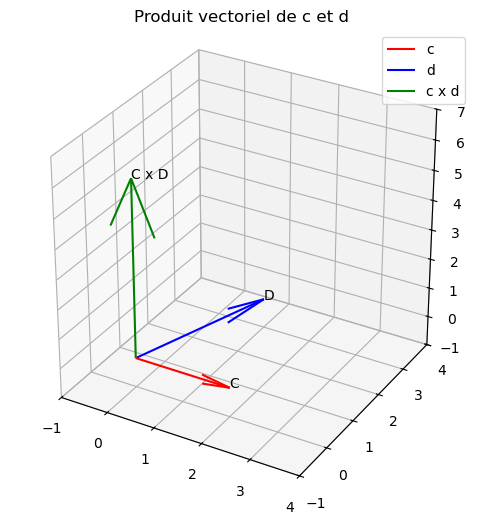

In [49]:


c = np.array([2,0,0])
d = np.array([1,3,0])
cross_product = np.cross(c,d)
print("c x d =", cross_product) 

area = np.linalg.norm(cross_product)

#
plt.figure(figsize=(6,6))
ax3d = plt.axes(projection='3d')
ax3d.set_xlim([ -1, 4])
ax3d.set_ylim([ -1, 4])
ax3d.set_zlim([ -1, 7])

ax3d.set_box_aspect([1,1,1])  # aspect ratio is 1:1:1
o = np.array([0,0,0])
ax3d.quiver(*o, *c, color='r', label='c' )
ax3d.text(*c, "C")
ax3d.quiver(*o, *d, color='b',label='d')
ax3d.text(*d, "D")
ax3d.quiver(*o, *cross_product, color='g',label='c x d')
ax3d.text(*cross_product, "C x D")

ax3d.grid()
ax3d.set_title("Produit vectoriel de c et d")
ax3d.legend()
plt.show()

** Partie 3: Produit Mixte et Volume

Ex5: Volume d'un Parallélépipède

Produit mixte de (v_1 x v_2).v_3 = 6
Volume du parallélépipède formé par v_1, v_2 et v_3 = 6


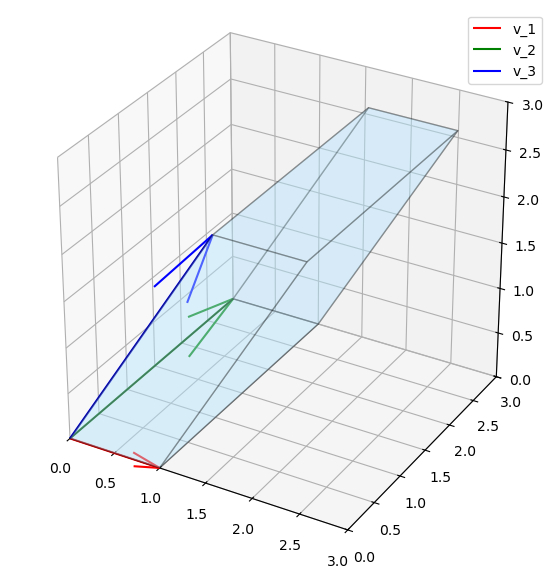

In [48]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from pyparsing import ABC

v_1 = np.array([1,0,0])
v_2 = np.array([0,3,0])
v_3 = np.array([1,1,2])
mixed_product = np.dot(np.cross(v_1, v_2), v_3)
print("Produit mixte de (v_1 x v_2).v_3 =", (mixed_product))

volume = abs(mixed_product)
print("Volume du parallélépipède formé par v_1, v_2 et v_3 =", volume)

#visualisation
origin = np.array([0,0,0])

v_12 = v_1 + v_2
v_13 = v_1 + v_3
v_23  = v_2 + v_3
v_123 = v_1 + v_2 + v_3   
# Faces du parallélépipède
faces = [
    [ origin, v_1, v_12, v_2],
    [origin, v_1, v_13, v_3],
    [origin, v_2, v_23, v_3],
    [v_1, v_12, v_123, v_13],
    [v_2, v_12 , v_123, v_23],
    [v_3, v_13, v_123, v_23]
]
# === Plot ===
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# 绘制透明面
poly = Poly3DCollection(faces, alpha=0.25, edgecolor='k')
poly.set_facecolor([0.7, 0.9, 1, 0.4])  # 淡蓝色
ax.add_collection3d(poly)

# 绘制三条向量
ax.quiver(*origin, *v_1, color='r', label='v_1')
ax.quiver(*origin, *v_2, color='g', label='v_2')
ax.quiver(*origin, *v_3, color='b', label='v_3')

# 等比例显示
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
ax.set_box_aspect([1,1,1])
ax.legend()

plt.show()

** Partie 4: Équations de Droites et postions relatives

EX6: Équation de Droite

Équation paramétrique de D1:
x = 2 + 4t
y = -1 
z = 3 + -1t

Équation systématique de D1:
(x - 2)/4 =(z - 3)/-1
y = -1

Point de la droite D1 pour t=1:
P1 = (6, -1, 2)


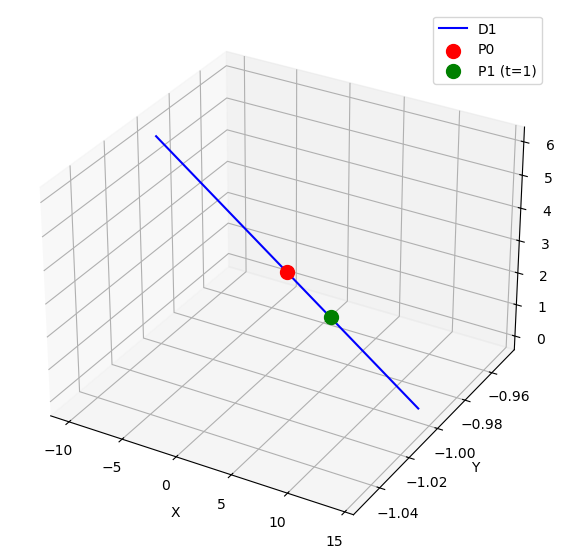

In [50]:
p_0 = np.array([2,-1,3])
d_1 = np.array([4,0,-1])
# Équation paramétrique de la droite
print("Équation paramétrique de D1:")
print(f"x = {p_0[0]} + {d_1[0]}t")
print(f"y = {p_0[1]} ")
print(f"z = {p_0[2]} + {d_1[2]}t")  

# Équation systématique de la droite
print("\nÉquation systématique de D1:")
print(f"(x - {p_0[0]})/{d_1[0]} =(z - {p_0[2]})/{d_1[2]}")
print (f"y = {p_0[1]}")

#3
t =1
p_1_x = p_0[0]+t*d_1[0]
p_1_y = p_0[1]+t*d_1[1]
p_1_z = p_0[2]+t*d_1[2] 
p_1 = np.array([p_1_x, p_1_y, p_1_z])
print("\nPoint de la droite D1 pour t=1:")
print(f"P1 = ({p_1[0]}, {p_1[1]}, {p_1[2]})")   

#visualisation
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

t = np.linspace(-3,3,100)
x = p_0[0] + d_1[0]*t
y = p_0[1] + d_1[1]*t
z = p_0[2] + d_1[2]*t   

ax.plot(x, y, z, label='D1', color='b')
ax.scatter(*p_0, color='r', s=100, label='P0')
ax.scatter(*p_1, color='g', s=100, label='P1 (t=1)') 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()


EX7: Postion Relative des Droites

Les droites sont colinéaires.
Les droites sont parallèles mais distinctes.


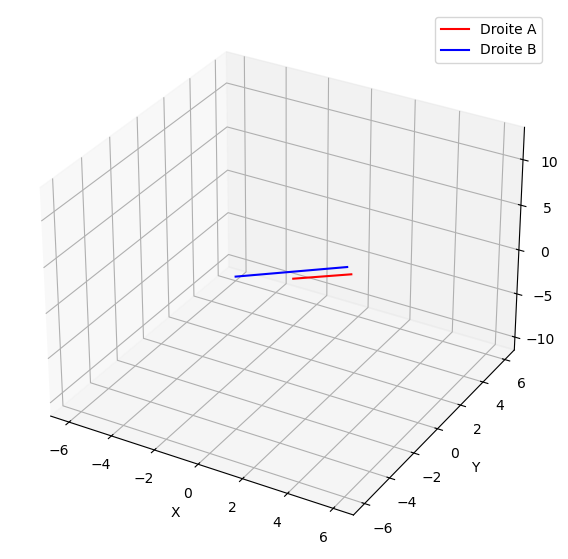

In [57]:
p_a = np.array([1,1,0])
d_a = np.array([1,-1,2])

p_b = np.array([0,0,1])
d_b = np.array([-2,2,-4])

cross_ab = np.cross(d_a, d_b)
norm_cross_ab = np.linalg.norm(cross_ab)
cross_pab_da =np.cross((p_b - p_a), d_a)
if(np.allclose(norm_cross_ab, 0) ):
    print("Les droites sont colinéaires.")
    if(np.allclose(cross_pab_da, 0)):
        print("Les droites sont confondues.")
    else:
        print("Les droites sont parallèles mais distinctes.")

t = np.linspace(-3,3, 100)
D_a = p_a + t[:,np.newaxis] *d_a
D_b = p_b + t[:,np.newaxis] *d_b

plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot3D(D_a[:,0], D_a[:,1], D_a[:,2], label='Droite A', color='r')
ax.plot3D(D_b[:,0], D_b[:,1], D_b[:,2], label='Droite B', color='b')
# ax.scatter(*p_a, color='r', s=5, label='Point sur A')
# ax.scatter(*p_b, color='b', s=5, label='Point sur B') 

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()